### import library

In [1]:
import os
import random
from PIL import Image
import json
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import seaborn as sns
import pandas as pd

### import mmdet file

In [3]:
import mmcv
from mmdet.datasets.transforms import (  # Importing required transforms
    Resize,
    FixScaleResize,
    ResizeShortestEdge,
    FixShapeResize,
    RandomFlip,
    RandomShift,
    SegRescale,
    PhotoMetricDistortion,
    Expand,
    MinIoURandomCrop,
    Albu,
    CutOut,
    Mosaic,
    MixUp,
    RandomAffine,
    YOLOXHSVRandomAug,
    CopyPaste,
    RandomErasing,
    CachedMosaic,
    CachedMixUp
)

### load files

In [4]:

# 데이터셋 폴더 경로
dataset_path = '/data/ephemeral/home/level2-objectdetection-cv-08/data/recycle'  # 실제 경로로 바꾸기

## 1. 이미지 랜덤 선택하여 플로팅 

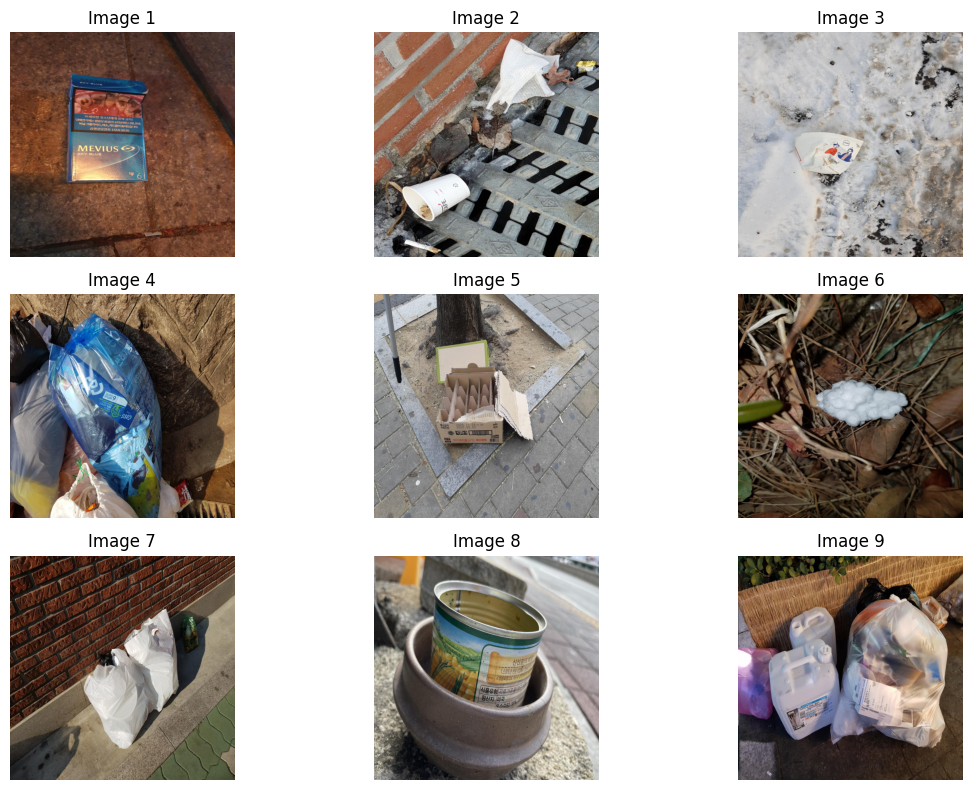

In [5]:
train_folder = os.path.join(dataset_path, 'train')
image_files = os.listdir(train_folder)
selected_images = random.sample(image_files, 9)

plt.figure(figsize=(12, 8))
for i, image_file in enumerate(selected_images, 1):
    image_path = os.path.join(train_folder, image_file)
    img = Image.open(image_path)
    
    plt.subplot(3, 3, i)
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.axis('off')

plt.tight_layout()
plt.show()

## 2. JSON 파일에서 이미지 및 바운딩 박스 정보 읽어 플로팅

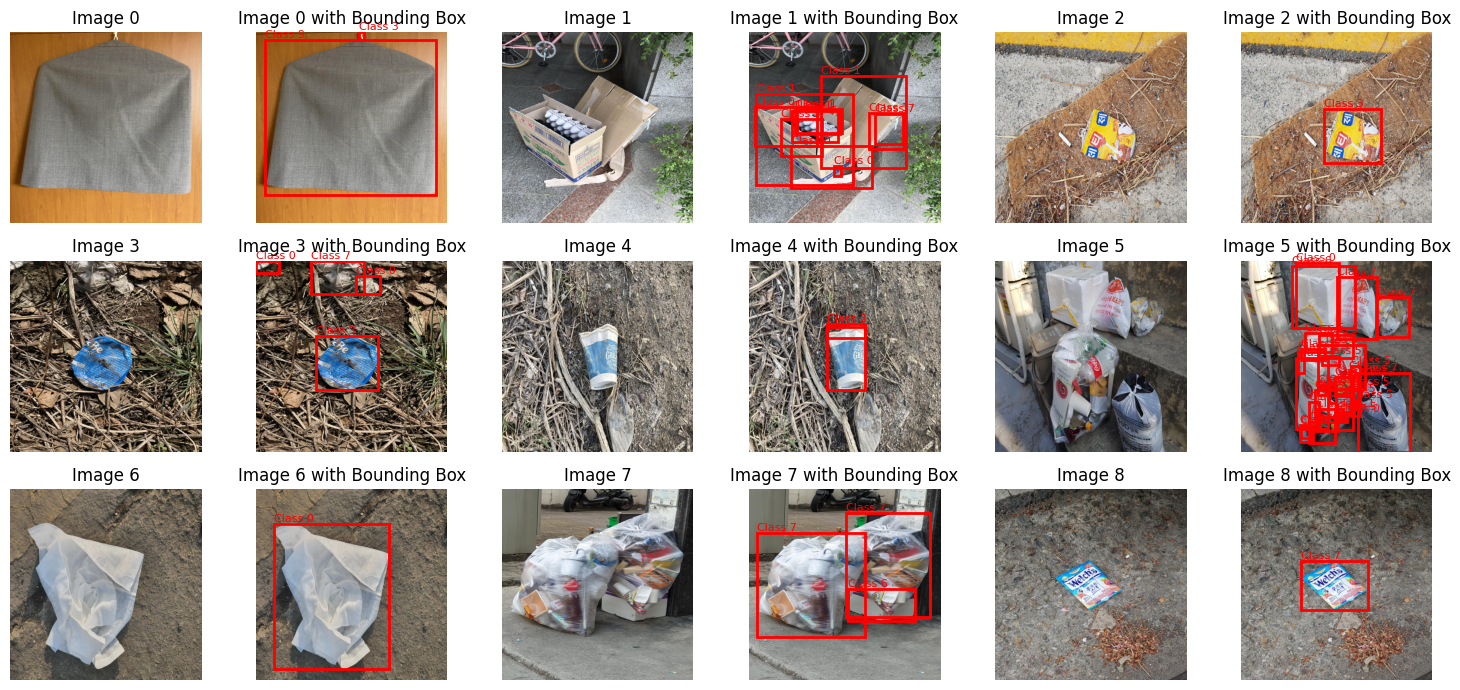

In [29]:

json_path = os.path.join(dataset_path, 'train.json')
with open(json_path, 'r') as json_file:
    data = json.load(json_file)

images = data['images']
annotations = data['annotations']

selected_images = random.sample(images, 9)

plt.figure(figsize=(15, 7))
for i, image_info in enumerate(selected_images):
    annotation_info = [anno for anno in annotations if anno['image_id'] == image_info['id']]

    plt.subplot(3, 6, i * 2 + 1)
    img_path = os.path.join(dataset_path, image_info['file_name'])
    img = Image.open(img_path)
    plt.imshow(img)
    plt.title(f'Image {i}')
    plt.axis('off')

    plt.subplot(3, 6, i * 2 + 2)
    plt.imshow(img)
    for bbox_info in annotation_info:
        bbox = bbox_info['bbox']
        category_id = bbox_info['category_id']
        rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3],
                                 linewidth=2, edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.text(bbox[0], bbox[1], f'Class {category_id}', color='r', fontsize=8, verticalalignment='bottom')

    plt.title(f'Image {i} with Bounding Box')
    plt.axis('off')

plt.tight_layout()
plt.show()


## 3. 클래스별 객체 개수 및 시각화

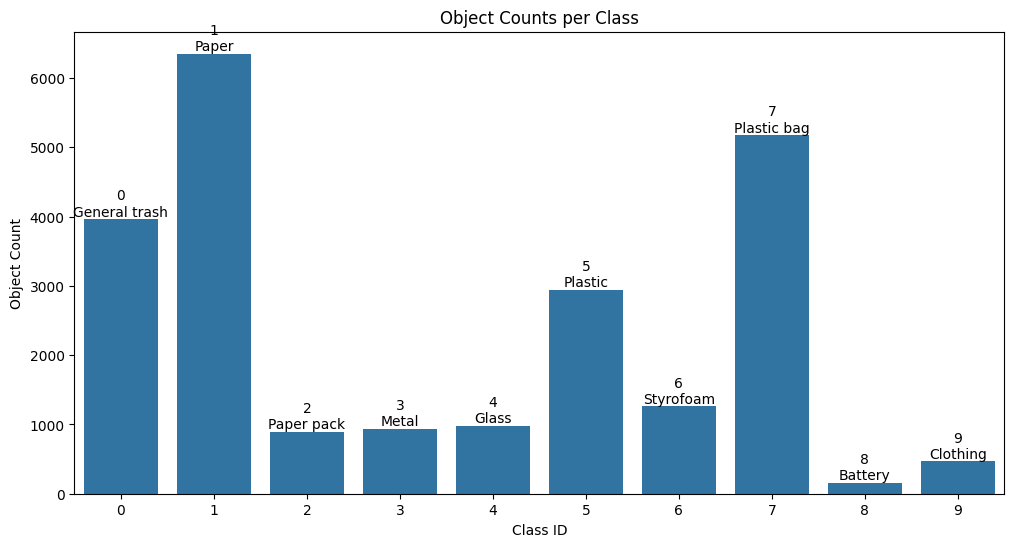

In [30]:
class_counts = {category['id']: 0 for category in data['categories']}
class_names = {category['id']: category['name'] for category in data['categories']}

for annotation in annotations:
    class_counts[annotation['category_id']] += 1

plt.figure(figsize=(12, 6))
ax = sns.barplot(x=list(class_counts.keys()), y=list(class_counts.values()))

plt.title('Object Counts per Class')
plt.xlabel('Class ID')
plt.ylabel('Object Count')

for i, count in enumerate(class_counts.values()):
    ax.text(i, count, f'{list(class_counts.keys())[i]}\n{class_names[list(class_counts.keys())[i]]}', ha='center', va='bottom')

plt.show()

## 4. 바운딩 박스의 가로 및 세로 크기 분포 확인

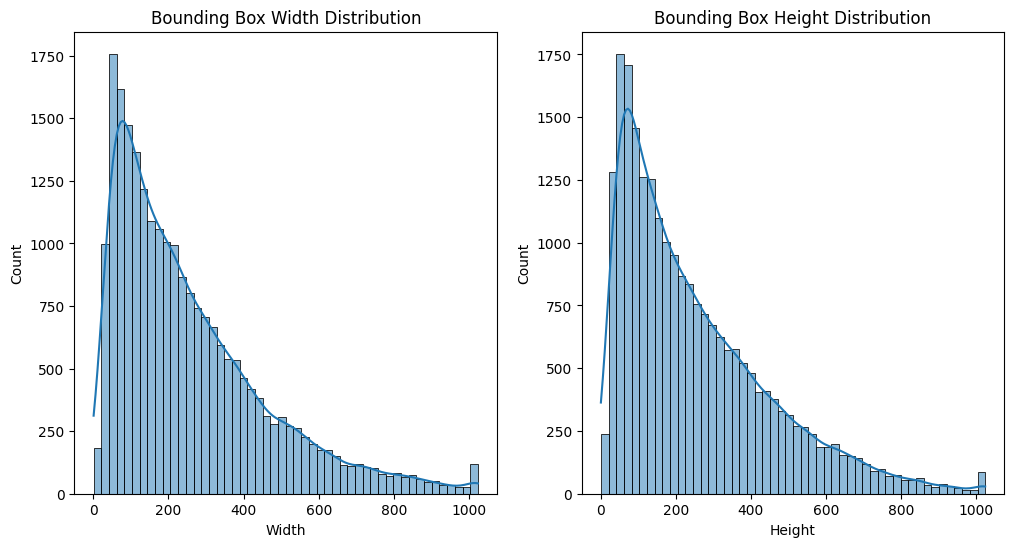

In [31]:

bbox_widths = [bbox['bbox'][2] for bbox in annotations]
bbox_heights = [bbox['bbox'][3] for bbox in annotations]

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(bbox_widths, bins=50, kde=True)
plt.title('Bounding Box Width Distribution')
plt.xlabel('Width')

plt.subplot(1, 2, 2)
sns.histplot(bbox_heights, bins=50, kde=True)
plt.title('Bounding Box Height Distribution')
plt.xlabel('Height')

plt.show()


## 5. 이미지당 객체 수 분포 확인

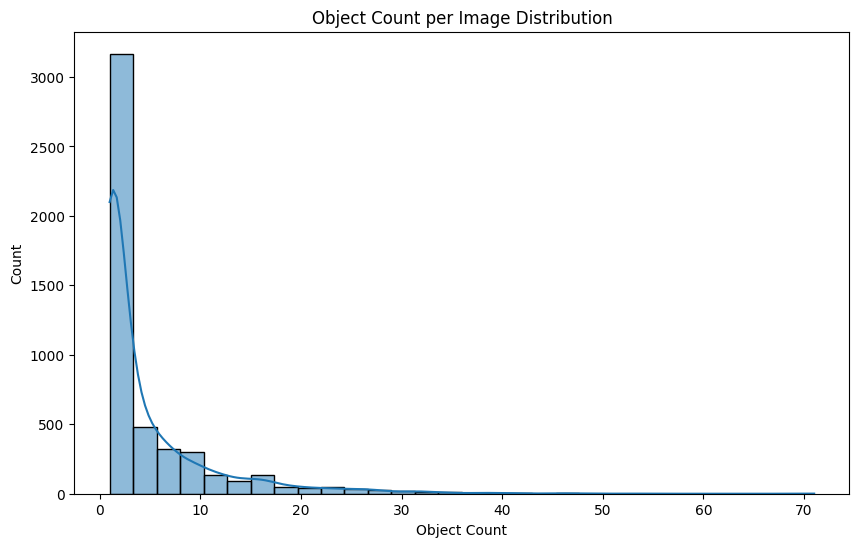

In [32]:

image_object_counts = {}
for annotation in annotations:
    image_id = annotation['image_id']
    image_object_counts[image_id] = image_object_counts.get(image_id, 0) + 1

image_object_counts_df = pd.DataFrame(list(image_object_counts.values()), columns=['Object Count'])
plt.figure(figsize=(10, 6))
sns.histplot(image_object_counts_df['Object Count'], bins=30, kde=True)
plt.title('Object Count per Image Distribution')
plt.xlabel('Object Count')
plt.show()

## test transform

In [6]:
# 이미지 파일의 이름만 포함된 리스트 생성
image_files = os.listdir(train_folder)
selected_images = random.sample(image_files, 9)

# 이미지를 읽어서 디버깅
img_paths = []
for image_file in selected_images:
    try:
        img_path = os.path.join(train_folder, image_file)
        img_paths.append(img_path)
        img = mmcv.imread(img_path)
        print(f'Successfully read image: {img_path}')
        print(f'Image shape: {img.shape}')
    except FileNotFoundError:
        print(f'Error reading image: {image_file}')


Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/4663.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/4787.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/3561.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/3531.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/2058.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/2992.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/data/recycle/train/2231.jpg
Image shape: (1024, 1024, 3)
Successfully read image: /data/ephemeral/home/level2-objectdetection-cv-08/d

In [7]:
# 이미지를 읽어서 디버깅
img = mmcv.imread(img_paths[0])
print(img.shape)


(1024, 1024, 3)


Error occurred with Resize: `scale` and`scale_factor` can not both be `None`
Error occurred with FixScaleResize: `scale` and`scale_factor` can not both be `None`
Error occurred with ResizeShortestEdge: ResizeShortestEdge.__init__() missing 1 required positional argument: 'scale'
Error occurred with FixShapeResize: FixShapeResize.__init__() missing 2 required positional arguments: 'width' and 'height'
Error occurred with RandomFlip: probs must be float or list of float, but                               got `<class 'NoneType'>`.
Error occurred with RandomShift: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices


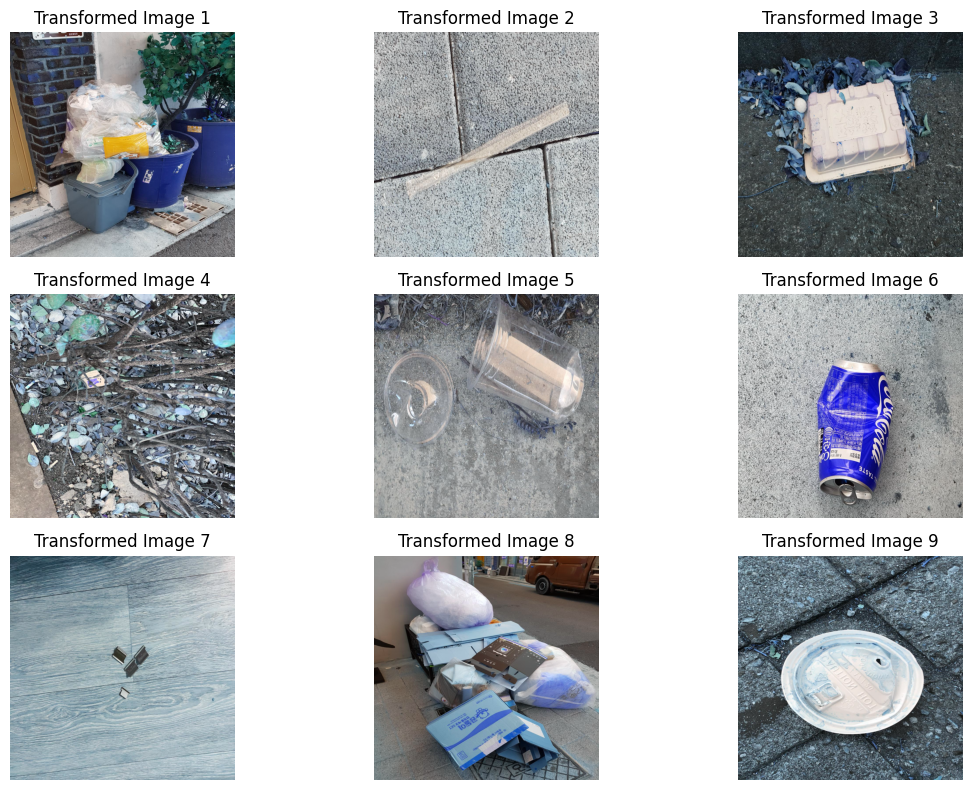

Error occurred with PhotoMetricDistortion: `img` is not found in results
Error occurred with Expand: `img` is not found in results
Error occurred with MinIoURandomCrop: `img` is not found in results
Error occurred with Albu: Albu.__init__() missing 1 required positional argument: 'transforms'
Error occurred with CutOut: CutOut.__init__() missing 1 required positional argument: 'n_holes'
Error occurred with Mosaic: 
Error occurred with MixUp: 
Error occurred with RandomAffine: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Error occurred with YOLOXHSVRandomAug: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices
Error occurred with CopyPaste: 
Error occurred with RandomErasing: RandomErasing.__init__() missing 2 required positional arguments: 'n_patches' and 'ratio'
Error occurred with CachedMosaic: only integers, slices (`:`), ellipsis (`...`), numpy.

In [10]:
# 각 Transform 클래스들을 테스트
transform_classes = [
    Resize,
    FixScaleResize,
    ResizeShortestEdge,
    FixShapeResize,
    RandomFlip,
    RandomShift,
    SegRescale,
    PhotoMetricDistortion,
    Expand,
    MinIoURandomCrop,
    Albu,
    CutOut,
    Mosaic,
    MixUp,
    RandomAffine,
    YOLOXHSVRandomAug,
    CopyPaste,
    RandomErasing,
    CachedMosaic,
    CachedMixUp
]

seg_rescale_transform = SegRescale(
    scale_factor=0.5,  # Set the scale factor for rescaling
    backend='cv2'  # Choose the backend: 'cv2' or 'pillow'
)
photo_metric_distortion_transform = PhotoMetricDistortion(
    brightness_delta=32,  # Set the delta of brightness
    contrast_range=(0.5, 1.5),  # Set the range of contrast
    saturation_range=(0.5, 1.5),  # Set the range of saturation
    hue_delta=18  # Set the delta of hue
)
expand_transform = Expand(
    mean=(0, 0, 0),  # Set the mean value of the dataset
    to_rgb=True,  # Set to True if you need to convert the mean order to align with RGB
    ratio_range=(1, 4),  # Set the range of expand ratio
    seg_ignore_label=None,  # Set the label of ignore segmentation map
    prob=0.5  # Set the probability of applying this transformation
)
min_iou_random_crop_transform = MinIoURandomCrop(
    min_ious=(0.1, 0.3, 0.5, 0.7, 0.9),  # Set minimum IoU thresholds
    min_crop_size=0.3,  # Set minimum crop size
    bbox_clip_border=True  # Whether to clip objects outside the image border
)
albu_transform = Albu(
    transforms=[
        # List of Albumentations transformations, you can use the example given in the class description
    ],
    bbox_params={
        # Bbox_params for Albumentations `Compose`, if needed
    },
    keymap={
        'img': 'image',
        'gt_masks': 'masks',
        'gt_bboxes': 'bboxes'
    },
    skip_img_without_anno=False  # Set to True if you want to skip images without annotations after augmentation
)


# 테스트할 트랜스폼 클래스 리스트에서 에러가 나는 클래스 제외
tested_transform_classes = []
for transform_class in transform_classes:
    try:
        # 인스턴스 생성
        transform = transform_class()
        
        # 이미지 변환 적용
        transformed_images = [transform(mmcv.imread(img_path)) for img_path in img_paths]
        
        # 변환된 이미지 플로팅
        plt.figure(figsize=(12, 8))
        for i, transformed_img in enumerate(transformed_images, 1):
            plt.subplot(3, 3, i)
            plt.imshow(transformed_img)
            plt.title(f'Transformed Image {i}')
            plt.axis('off')

        plt.tight_layout()
        plt.show()
        
        # 에러가 나지 않으면 테스트에 포함
        tested_transform_classes.append(transform_class)
    except Exception as e:
        print(f"Error occurred with {transform_class.__name__}: {e}")

# 테스트에 성공한 클래스 목록 출력
print("Tested Transform Classes:", [cls.__name__ for cls in tested_transform_classes])
